In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
%matplotlib inline

In [2]:
# [1(beta_0), 친구수, 근무시간, 박사학위 취득 여부]
X = [[1,49,4,0],[1,41,9,0],[1,40,8,0],[1,25,6,0],[1,21,1,0],[1,21,0,0],[1,19,3,0],[1,19,0,0],[1,18,9,0],[1,18,8,0],[1,16,4,0],[1,15,3,0],[1,15,0,0],[1,15,2,0],[1,15,7,0],[1,14,0,0],[1,14,1,0],[1,13,1,0],[1,13,7,0],[1,13,4,0],[1,13,2,0],[1,12,5,0],[1,12,0,0],[1,11,9,0],[1,10,9,0],[1,10,1,0],[1,10,1,0],[1,10,7,0],[1,10,9,0],[1,10,1,0],[1,10,6,0],[1,10,6,0],[1,10,8,0],[1,10,10,0],[1,10,6,0],[1,10,0,0],[1,10,5,0],[1,10,3,0],[1,10,4,0],[1,9,9,0],[1,9,9,0],[1,9,0,0],[1,9,0,0],[1,9,6,0],[1,9,10,0],[1,9,8,0],[1,9,5,0],[1,9,2,0],[1,9,9,0],[1,9,10,0],[1,9,7,0],[1,9,2,0],[1,9,0,0],[1,9,4,0],[1,9,6,0],[1,9,4,0],[1,9,7,0],[1,8,3,0],[1,8,2,0],[1,8,4,0],[1,8,9,0],[1,8,2,0],[1,8,3,0],[1,8,5,0],[1,8,8,0],[1,8,0,0],[1,8,9,0],[1,8,10,0],[1,8,5,0],[1,8,5,0],[1,7,5,0],[1,7,5,0],[1,7,0,0],[1,7,2,0],[1,7,8,0],[1,7,10,0],[1,7,5,0],[1,7,3,0],[1,7,3,0],[1,7,6,0],[1,7,7,0],[1,7,7,0],[1,7,9,0],[1,7,3,0],[1,7,8,0],[1,6,4,0],[1,6,6,0],[1,6,4,0],[1,6,9,0],[1,6,0,0],[1,6,1,0],[1,6,4,0],[1,6,1,0],[1,6,0,0],[1,6,7,0],[1,6,0,0],[1,6,8,0],[1,6,4,0],[1,6,2,1],[1,6,1,1],[1,6,3,1],[1,6,6,1],[1,6,4,1],[1,6,4,1],[1,6,1,1],[1,6,3,1],[1,6,4,1],[1,5,1,1],[1,5,9,1],[1,5,4,1],[1,5,6,1],[1,5,4,1],[1,5,4,1],[1,5,10,1],[1,5,5,1],[1,5,2,1],[1,5,4,1],[1,5,4,1],[1,5,9,1],[1,5,3,1],[1,5,10,1],[1,5,2,1],[1,5,2,1],[1,5,9,1],[1,4,8,1],[1,4,6,1],[1,4,0,1],[1,4,10,1],[1,4,5,1],[1,4,10,1],[1,4,9,1],[1,4,1,1],[1,4,4,1],[1,4,4,1],[1,4,0,1],[1,4,3,1],[1,4,1,1],[1,4,3,1],[1,4,2,1],[1,4,4,1],[1,4,4,1],[1,4,8,1],[1,4,2,1],[1,4,4,1],[1,3,2,1],[1,3,6,1],[1,3,4,1],[1,3,7,1],[1,3,4,1],[1,3,1,1],[1,3,10,1],[1,3,3,1],[1,3,4,1],[1,3,7,1],[1,3,5,1],[1,3,6,1],[1,3,1,1],[1,3,6,1],[1,3,10,1],[1,3,2,1],[1,3,4,1],[1,3,2,1],[1,3,1,1],[1,3,5,1],[1,2,4,1],[1,2,2,1],[1,2,8,1],[1,2,3,1],[1,2,1,1],[1,2,9,1],[1,2,10,1],[1,2,9,1],[1,2,4,1],[1,2,5,1],[1,2,0,1],[1,2,9,1],[1,2,9,1],[1,2,0,1],[1,2,1,1],[1,2,1,1],[1,2,4,1],[1,1,0,1],[1,1,2,1],[1,1,2,1],[1,1,5,1],[1,1,3,1],[1,1,10,1],[1,1,6,1],[1,1,0,1],[1,1,8,1],[1,1,6,1],[1,1,4,1],[1,1,9,1],[1,1,9,1],[1,1,4,1],[1,1,2,1],[1,1,9,1],[1,1,0,1],[1,1,8,1],[1,1,6,1],[1,1,1,1],[1,1,1,1],[1,1,5,1]]

# 사이트에서 보내는 시간(분)
Y = [68.77,51.25,52.08,38.36,44.54,57.13,51.4,41.42,31.22,34.76,54.01,38.79,47.59,49.1,27.66,41.03,36.73,48.65,28.12,46.62,35.57,32.98,35,26.07,23.77,39.73,40.57,31.65,31.21,36.32,20.45,21.93,26.02,27.34,23.49,46.94,30.5,33.8,24.23,21.4,27.94,32.24,40.57,25.07,19.42,22.39,18.42,46.96,23.72,26.41,26.97,36.76,40.32,35.02,29.47,30.2,31,38.11,38.18,36.31,21.03,30.86,36.07,28.66,29.08,37.28,15.28,24.17,22.31,30.17,25.53,19.85,35.37,44.6,17.23,13.47,26.33,35.02,32.09,24.81,19.33,28.77,24.26,31.98,25.73,24.86,16.28,34.51,15.23,39.72,40.8,26.06,35.76,34.76,16.13,44.04,18.03,19.65,32.62,35.59,39.43,14.18,35.24,40.13,41.82,35.45,36.07,43.67,24.61,20.9,21.9,18.79,27.61,27.21,26.61,29.77,20.59,27.53,13.82,33.2,25,33.1,36.65,18.63,14.87,22.2,36.81,25.53,24.62,26.25,18.21,28.08,19.42,29.79,32.8,35.99,28.32,27.79,35.88,29.06,36.28,14.1,36.63,37.49,26.9,18.58,38.48,24.48,18.95,33.55,14.24,29.04,32.51,25.63,22.22,19,32.73,15.16,13.9,27.2,32.01,29.27,33,13.74,20.42,27.32,18.23,35.35,28.48,9.08,24.62,20.12,35.26,19.92,31.02,16.49,12.16,30.7,31.22,34.65,13.13,27.51,33.2,31.57,14.1,33.42,17.44,10.12,24.42,9.82,23.39,30.93,15.03,21.67,31.09,33.29,22.61,26.89,23.48,8.38,27.81,32.35,23.84]

In [3]:
X = np.array(X)
Y = np.array(Y)

# 선형회귀

## 1. OLS
- 예제 데이터 활용 
    - X : [1, 친구수, 근무시간, 박사학위 취득여부]
    - Y : 웹사이트에서 보내는 시간 
- ### $ Y = Xw $
- ### $w^ *=(X^TX)^ { -1} X^ Ty$

### (1) numpy를 이용한 선형회귀 분석

In [4]:
# 최적 가중치 벡터를 구한다.

w = np.dot(np.dot(np.linalg.inv(np.dot(X.T, X)), X.T), Y)
w

array([30.57901812,  0.97250518, -1.86503639,  0.9232007 ])

In [5]:
# 예측값 연산

y_predicted = np.dot(X, w)

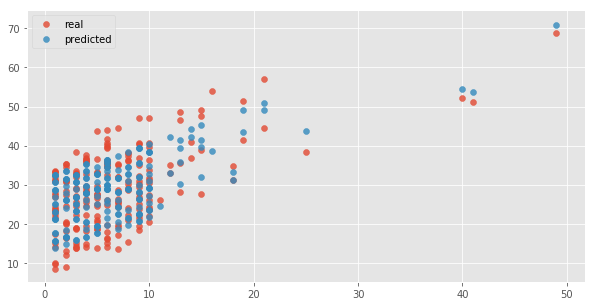

In [6]:
## 시각화
plt.figure(figsize = (10, 5))
plt.scatter(X[:, 1], Y, label = 'real', alpha = 0.8)
plt.scatter(X[:, 1], y_predicted, label = 'predicted', alpha = 0.8) ## 
plt.legend()

### (2) sklearn

In [7]:
from sklearn.linear_model import LinearRegression

In [8]:
sk_model = LinearRegression().fit(X, Y)

In [9]:
## 가중치 벡터 (w2 ~ w4)
sk_model.coef_

array([ 0.        ,  0.97250518, -1.86503639,  0.9232007 ])

In [10]:
## 상수항 (w1)
sk_model.intercept_

30.579018123991226

In [11]:
print('결정계수 : ', sk_model.score(X, Y))

결정계수 :  0.680011018137578


## (3) statsmodels
- 통계 및 회귀 분석이나 시계열 분석을 위한 라이브러리

In [12]:
import statsmodels.api as sm

In [13]:
st_model = sm.OLS(Y, X).fit() ## y먼저 입력한다.

In [14]:
st_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.680
Model:                            OLS   Adj. R-squared:                  0.675
Method:                 Least Squares   F-statistic:                     141.0
Date:                Sat, 08 Sep 2018   Prob (F-statistic):           5.39e-49
Time:                        18:39:48   Log-Likelihood:                -636.61
No. Observations:                 203   AIC:                             1281.
Df Residuals:                     199   BIC:                             1294.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         30.5790      1.190     25.692      0.000      28.232      32.926
x1             0.9725      0.080     12.188      0.000       0.815       1.130
x2            -1.8650      0.127    -14.721      0.000      -2.115      -1.615
x3             0.9232      0.998      0.925      0.356      -1.044       2.891
==============================================================================
Omnibus:                        2.820   Durbin-Watson:                   2.044
Prob(Omnibus):                  0.244   Jarque-Bera (JB):                2.010
Skew:                           0.013   Prob(JB):                        0.366
Kurtosis:                       2.513   Cond. No.                         37.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

-----

In [15]:
# 결정계수  : 1 - RSS/TSS
# RSS : ( 실제값 - 예측값)
# TSS : ( 실제값 - 평균 )

def RSS(w):
    residual = Y - np.dot(X, w)
    rss = np.dot(residual, residual)
    return rss

def TSS(y):
    diff =  y - y.mean()
    tss = np.dot(diff, diff)
    return tss

def r_squared(y, x, w):
    return 1 - RSS(w)/TSS(y)

In [16]:
print( '결정계수 : ', r_squared(Y, X, w))

결정계수 :  0.680011018137578


## 2. 수치적 최적화
- scipy를 활용한 수치적 최적화
- RSS
- optimization

In [17]:
from scipy import optimize

In [18]:
## 초기값 설정

import random
random.seed(10)
w0 = np.array([random.random() for i in range(4)])

In [19]:
# 목적함수 : RSS
optimization = optimize.minimize(RSS, w0, 
                                method='nelder-mead',    ## gradient를 알 수 없을 때 사용할 수 있는 방법
                                options={'xtol': 1e-8,   ## step size
                                    'disp': True})

Optimization terminated successfully.
         Current function value: 6294.264579
         Iterations: 353
         Function evaluations: 621


In [20]:
optimization.x

array([30.57901812,  0.97250518, -1.86503638,  0.92320066])

In [21]:
## OLS로 구한 w와 거의 같다
w

array([30.57901812,  0.97250518, -1.86503639,  0.9232007 ])

-----

## 3. 모델 해석하기
- x : [1(beta_0), 친구수, 근무시간, 박사학위 취득 여부]
- y : 사이트에서 보내는 시간
> ### y = 30.57 + 0.97 \* 친구수 + (-1.86) \* 근무시간 + 0.92 \* 박사 취득여부

-----

## 4. 부트스트래핑(Bootstrapping)
- 중복 허용 데이터 추출
- 연산된 계수 값 저장
- 통계치 확인

In [24]:
np.random.choice(10, 20, replace=True)

array([6, 9, 5, 6, 0, 6, 7, 9, 6, 2, 8, 4, 7, 8, 7, 6, 4, 7, 8, 9])

In [22]:
def bootstrap_sample(x, y):
    import random
    """중복허용 데이터 추출"""
    idx = np.random.choice(len(x), len(x), replace=True) # 0 ~ len(x)까지의 숫자 중 len(x) 개수 만큼 중복 재추출한다.
    x_sample = x[idx] # 중복 재추출된 숫자를 인덱스로 정의하고 슬라이싱함
    y_sample = y[idx]    
    
    return x_sample, y_sample

In [28]:
def estimate_w(x, y):
    """각 데이터에 대해 w 계산"""
    w = np.dot(np.dot(np.linalg.inv(np.dot(x.T, x)), x.T), y)
    return w

In [29]:
def bootstrapping(N, x, y):
    """부트스트래핑"""
    params = []
    for _ in range(N):
        x_sample, y_sample = bootstrap_sample(x, y)
        w = estimate_w(x_sample, y_sample)
        params.append(w)
    return np.array(params)

In [30]:
bootstrap_statics = bootstrapping(1000, X, Y)

In [31]:
bootstrap_statics

array([[30.24738775,  0.91597946, -1.77211685,  0.81908013],
       [29.97813132,  1.04652646, -1.92059411,  1.79559217],
       [30.20544769,  0.96319349, -1.91601062,  1.69069928],
       ...,
       [30.19454728,  0.94995716, -1.84996254,  1.2612888 ],
       [30.83939526,  0.99889304, -1.92537507,  1.56407579],
       [32.06393879,  0.96377555, -2.11056534,  0.37973415]])

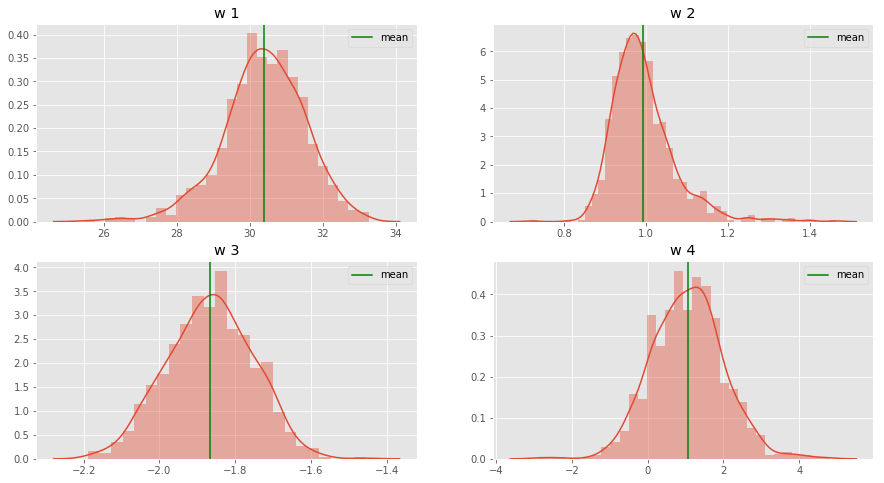

In [32]:
## 시각화
plt.figure(figsize=(15, 8))
for i in range(len(bootstrap_statics[0])):
    ax = plt.subplot(221 + i)
    plt.title('w %s' % (i+1))
    sns.distplot(bootstrap_statics[:, i])
    plt.axvline(bootstrap_statics[:, i].mean(), c = 'green', label = 'mean')
    plt.legend()

In [33]:
print('평균 :' ,bootstrap_statics.mean(axis=0))
print('표준오차 :',bootstrap_statics.std(axis=0)) # 표준 오차 = 표본평균의 표준편차

평균 : [30.38571891  0.99370707 -1.8666439   1.05559702]
표준오차 : [1.12061381 0.07739332 0.11280626 0.94565603]


> ## 그렇다면 각 가중치들이 안정적인 값들인지는 어떻게 확인할 수 있을까?
- 각 변수들에 대한 가설검정을 통해 확인할 수 있다.
    - 귀무가설($H_0$) : $w_i = 0$
    - 귀무가설을 기각할 수 없다면 w_i는 회귀모델에 영향을 미치지 못하는 가중치가 된다.

- ## 가설 검정을 실시하기위한 준비
    - bootstrapping으로 만들어진 w의 분포에 대한 가정
        - ***w의 분포는 n-k (변수의 개수)의 자유도를 가진 t 분포를 따른다.***
    - 자유도가 n-k 인 t 분포에서 부트스트래핑으로 구한 가중치의 t검정통계량이 어디에 위치해있는지 살펴본다.

In [34]:
from scipy import stats

In [36]:
def t_p_value(w_hat_i, sigma_i):
    rv = stats.t(199) # 199 = 203(n) - 4(k)
    if w_hat_i > 0:
        return 2*(1-rv.cdf(w_hat_i/sigma_i))
    else:
        return 2*(rv.cdf(w_hat_i/sigma_i))

In [37]:
for i in range(4):
    w_mean = bootstrap_statics[:, i].mean()
    w_std = bootstrap_statics[:, i].std()
    print('w_{0}의 p-value : '.format(i+1), round(t_p_value(w_mean, w_std), 4))

w_1의 p-value :  0.0
w_2의 p-value :  0.0
w_3의 p-value :  0.0
w_4의 p-value :  0.2657


In [38]:
## 4번째 변수는 p - value가 0.05이상이므로 w_i = 0이라는 사실을 기각할 수 없다.

In [39]:
w

array([30.57901812,  0.97250518, -1.86503639,  0.9232007 ])

## statsmodel 결과와 비교

In [40]:
import statsmodels.api as sm

In [41]:
st_model = sm.OLS(Y, X).fit() ## y먼저 입력한다.

In [42]:
st_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.680
Model:                            OLS   Adj. R-squared:                  0.675
Method:                 Least Squares   F-statistic:                     141.0
Date:                Sat, 08 Sep 2018   Prob (F-statistic):           5.39e-49
Time:                        18:50:57   Log-Likelihood:                -636.61
No. Observations:                 203   AIC:                             1281.
Df Residuals:                     199   BIC:                             1294.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         30.5790      1.190     25.692      0.000      28.232      32.926
x1             0.9725      0.080     12.188      0.000       0.815       1.130
x2            -1.8650      0.127    -14.721      0.000      -2.115      -1.615
x3             0.9232      0.998      0.925      0.356      -1.044       2.891
==============================================================================
Omnibus:                        2.820   Durbin-Watson:                   2.044
Prob(Omnibus):                  0.244   Jarque-Bera (JB):                2.010
Skew:                           0.013   Prob(JB):                        0.366
Kurtosis:                       2.513   Cond. No.                         37.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

-----

## 5. Regularization

> ## Ridge
- ## $\hat { w } ^{ ridge* }=(X^{ T }X+\lambda { I })^{ { -1 } }X^{ T }Y$

In [43]:
ridge_w_list = []
for i in range(1, 20):
    alpha = i ## alpha = 람다
    lm = alpha*np.identity(X.shape[1])
    lm[0] = lm[0] * 0  ## 상수항에는 제약을 가하지 않기 때문에 0으로 만든다.
    
    c = np.dot(X.T, X) + lm
    ridge_w = np.dot(np.linalg.inv(c), np.dot(X.T, Y))
    ridge_w_list.append(ridge_w)
    print('lambda :', i, ', 최적 가중치 : ', ridge_w, '결정계수 :', r_squared(Y, X, ridge_w))

lambda : 1 , 최적 가중치 :  [30.60105844  0.97093209 -1.86416257  0.89373122] 결정계수 : 0.6800095187110734
lambda : 2 , 최적 가중치 :  [30.62158671  0.96944479 -1.86328503  0.8660113 ] 결정계수 : 0.680005348985536
lambda : 3 , 최적 가중치 :  [30.64073406  0.96803587 -1.86240417  0.83988965] 결정계수 : 0.6799989388624408
lambda : 4 , 최적 가중치 :  [30.65861688  0.96669873 -1.86152036  0.81523193] 결정계수 : 0.6799906466973746
lambda : 5 , 최적 가중치 :  [30.6753389   0.96542753 -1.8606339   0.79191844] 결정계수 : 0.6799807721548309
lambda : 6 , 최적 가중치 :  [30.69099284  0.964217   -1.85974509  0.76984219] 결정계수 : 0.6799695665354893
lambda : 7 , 최적 가중치 :  [30.70566181  0.96306246 -1.85885418  0.74890727] 결정계수 : 0.6799572411180561
lambda : 8 , 최적 가중치 :  [30.71942057  0.96195967 -1.85796141  0.72902739] 결정계수 : 0.6799439739318235
lambda : 9 , 최적 가중치 :  [30.73233652  0.96090482 -1.85706697  0.71012479] 결정계수 : 0.6799299152816349
lambda : 10 , 최적 가중치 :  [30.74447059  0.95989447 -1.85617105  0.69212913] 결정계수 : 0.679915192275524
lambda : 11

> ## sklearn
- ridge, lasso 계수 비교

In [44]:
from sklearn.linear_model import Ridge, Lasso

In [45]:
data = []
for a in range(20):
    ridge = Ridge(alpha=a).fit(X, Y)
    data.append(pd.Series(np.hstack([ridge.intercept_, ridge.coef_[1:], ridge.score(X, Y)])))
    
df_ridge = pd.DataFrame(data, index=range(20))
df_ridge.columns = ['w0', 'w1', 'w2', 'w3', 'r_squared']

In [46]:
data = []
for a in range(20):
    lasso = Lasso(alpha=a).fit(X, Y)
    data.append(pd.Series(np.hstack([lasso.intercept_, lasso.coef_[1:], lasso.score(X, Y)])))
    
df_lasso = pd.DataFrame(data, index=range(20))
df_lasso.columns = ['w0', 'w1', 'w2', 'w3', 'r_squared']

In [47]:
pd.concat([df_ridge, df_lasso], axis=1)

,w0,w1,w2,w3,r_squared,w0,w1,w2,w3,r_squared
0,30.579018,0.972505,-1.865036,0.923201,0.680011,30.579018,0.972505,-1.865036,0.923201,0.680011
1,30.601058,0.970932,-1.864163,0.893731,0.680010,31.083164,0.900505,-1.763208,0.000000,0.677280
2,30.621587,0.969445,-1.863285,0.866011,0.680005,30.788639,0.873570,-1.658937,0.000000,0.673218
3,30.640734,0.968036,-1.862404,0.839890,0.679999,30.494115,0.846635,-1.554665,0.000000,0.666448
4,30.658617,0.966699,-1.861520,0.815232,0.679991,30.199590,0.819700,-1.450394,-0.000000,0.656969
5,30.675339,0.965428,-1.860634,0.791918,0.679981,29.905066,0.792765,-1.346123,-0.000000,0.644783
6,30.690993,0.964217,-1.859745,0.769842,0.679970,29.610542,0.765830,-1.241851,-0.000000,0.629888
7,30.705662,0.963062,-1.858854,0.748907,0.679957,29.316017,0.738895,-1.137580,-0.000000,0.612285
8,30.719421,0.961960,-1.857961,0.729027,0.679944,29.021493,0.711960,-1.033308,-0.000000,0.591974
9,30.732337,0.960905,-1.857067,0.710125,0.679930,28.726968,0.685026,-0.929037,-0.000000,0.568955


> ## lasso는 중요하지 않는 회귀계수들을 감소시킴으로써, 변수를 선택하는 효과를 낸다.
> ### 이런 효과 때문에 lasso도 마치 차원을 축소하는 효과를 낸다.